In [43]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('steps.csv', sep=";")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = pd.read_csv("survey.csv")
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df=pd.merge(df,df1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


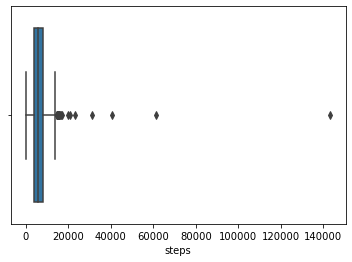

In [5]:
df["steps"]=df.iloc[:,9:336].mean(axis=1)
df.head()
sns.boxplot(x='steps', data=df)
plt.show()

In [6]:
df= df[(df['steps'] < 25000)].sort_values(by='steps',ascending=False)
df= df[(df['weight'] < 200)].sort_values(by='steps',ascending=False)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,steps
109,110,250.0,6784.0,7258.0,2651.0,29784.0,13554.0,NaN,10259.0,12773.0,...,NaN,Bordeaux,Female,45-54,4,4,Bachelor,157.0,69.0,22919.065455
834,835,358.0,4669.0,12987.0,5754.0,10464.0,16742.0,14157.0,182.0,4400.0,...,NaN,Bordeaux,Male,55-64,2,2,Bachelor,183.0,77.0,20626.390805
851,852,298.0,9192.0,7823.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Female,45-54,4,4,High school,168.0,78.0,19792.658824
656,657,2898.0,11569.0,3186.0,212.0,3956.0,1046.0,1724.0,2847.0,4382.0,...,NaN,Montpellier,Male,25-34,1,1,Bachelor,169.0,63.0,16837.063291
302,303,298.0,12182.0,3943.0,3740.0,4390.0,7581.0,NaN,6082.0,4202.0,...,NaN,Bordeaux,Female,45-54,5,4,Master or doctorate,168.0,90.0,16749.621622


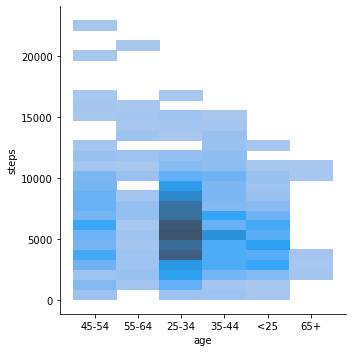

In [7]:
ax=sns.displot(x="age", y="steps", data=df)

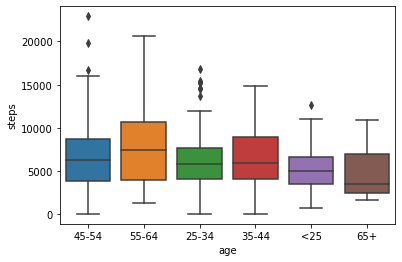

In [8]:
ax=sns.boxplot(x="age", y="steps", data=df)

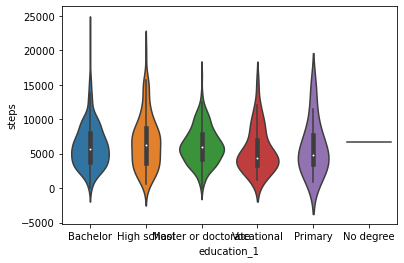

In [9]:
ax=sns.violinplot(x="education_1", y="steps", data=df)

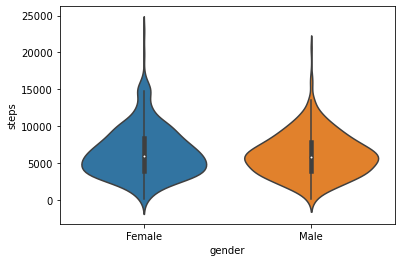

In [10]:
ax=sns.violinplot(x="gender", y="steps", data=df)

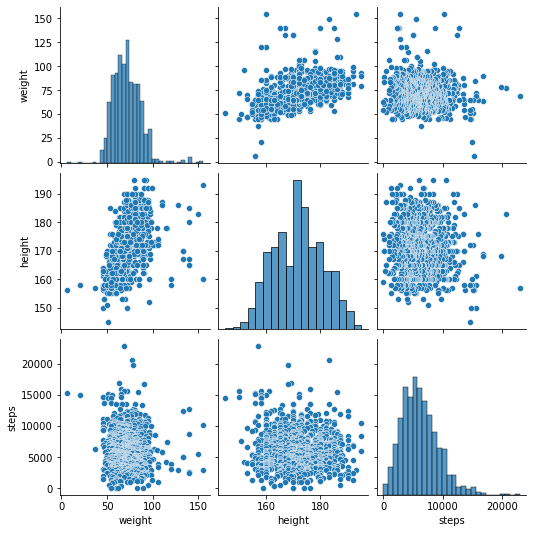

In [11]:
df_sel = df[['weight',"height","steps"]] #a subset with some variables
sns.pairplot(df_sel)
plt.show()

In [12]:
corr = df[["height","weight","steps"]].corr()
corr

,height,weight,steps
height,1.000000,0.514211,-0.067578
weight,0.514211,1.000000,-0.085908
steps,-0.067578,-0.085908,1.000000


In [13]:
df["bmi"]=df["weight"]/(df["height"]/100)**2
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,steps,bmi
109,110,250.0,6784.0,7258.0,2651.0,29784.0,13554.0,NaN,10259.0,12773.0,...,Bordeaux,Female,45-54,4,4,Bachelor,157.0,69.0,22919.065455,27.993022
834,835,358.0,4669.0,12987.0,5754.0,10464.0,16742.0,14157.0,182.0,4400.0,...,Bordeaux,Male,55-64,2,2,Bachelor,183.0,77.0,20626.390805,22.992624
851,852,298.0,9192.0,7823.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Female,45-54,4,4,High school,168.0,78.0,19792.658824,27.636054
656,657,2898.0,11569.0,3186.0,212.0,3956.0,1046.0,1724.0,2847.0,4382.0,...,Montpellier,Male,25-34,1,1,Bachelor,169.0,63.0,16837.063291,22.058051
302,303,298.0,12182.0,3943.0,3740.0,4390.0,7581.0,NaN,6082.0,4202.0,...,Bordeaux,Female,45-54,5,4,Master or doctorate,168.0,90.0,16749.621622,31.887755


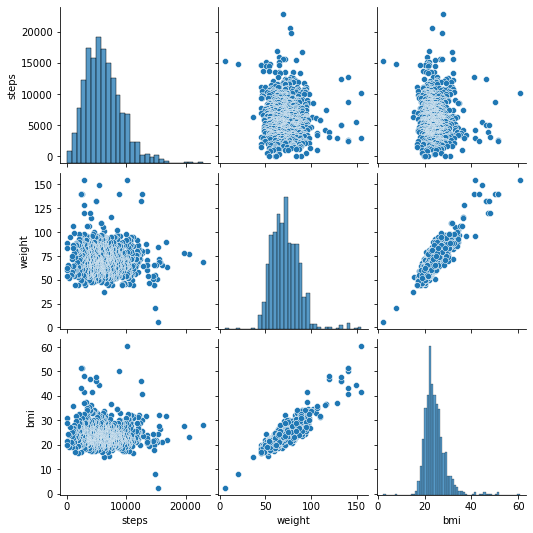

In [18]:
df_sel = df[['steps',"weight","bmi"]] #a subset with some variables
sns.pairplot(df_sel)
plt.show()


In [16]:
df["meansteps"]=df["steps"].mean()
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,steps,bmi,meansteps
109,110,250.0,6784.0,7258.0,2651.0,29784.0,13554.0,NaN,10259.0,12773.0,...,Female,45-54,4,4,Bachelor,157.0,69.0,22919.065455,27.993022,6222.420953
834,835,358.0,4669.0,12987.0,5754.0,10464.0,16742.0,14157.0,182.0,4400.0,...,Male,55-64,2,2,Bachelor,183.0,77.0,20626.390805,22.992624,6222.420953
851,852,298.0,9192.0,7823.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,45-54,4,4,High school,168.0,78.0,19792.658824,27.636054,6222.420953
656,657,2898.0,11569.0,3186.0,212.0,3956.0,1046.0,1724.0,2847.0,4382.0,...,Male,25-34,1,1,Bachelor,169.0,63.0,16837.063291,22.058051,6222.420953
302,303,298.0,12182.0,3943.0,3740.0,4390.0,7581.0,NaN,6082.0,4202.0,...,Female,45-54,5,4,Master or doctorate,168.0,90.0,16749.621622,31.887755,6222.420953


In [21]:
df1=df[["id","city","gender","age","hh_size","education","height","weight","steps","bmi","meansteps"]]
df1.head()

,id,city,gender,age,hh_size,education,height,weight,steps,bmi,meansteps
109,110,Bordeaux,Female,45-54,4,4,157.0,69.0,22919.065455,27.993022,6222.420953
834,835,Bordeaux,Male,55-64,2,2,183.0,77.0,20626.390805,22.992624,6222.420953
851,852,Lyon,Female,45-54,4,4,168.0,78.0,19792.658824,27.636054,6222.420953
656,657,Montpellier,Male,25-34,1,1,169.0,63.0,16837.063291,22.058051,6222.420953
302,303,Bordeaux,Female,45-54,5,4,168.0,90.0,16749.621622,31.887755,6222.420953


In [30]:
df_dummies = pd.get_dummies(df1,columns=["gender"])
df_dummies.head()

,id,city,age,hh_size,education,height,weight,steps,bmi,meansteps,gender_Female,gender_Male
109,110,Bordeaux,45-54,4,4,157.0,69.0,22919.065455,27.993022,6222.420953,1,0
834,835,Bordeaux,55-64,2,2,183.0,77.0,20626.390805,22.992624,6222.420953,0,1
851,852,Lyon,45-54,4,4,168.0,78.0,19792.658824,27.636054,6222.420953,1,0
656,657,Montpellier,25-34,1,1,169.0,63.0,16837.063291,22.058051,6222.420953,0,1
302,303,Bordeaux,45-54,5,4,168.0,90.0,16749.621622,31.887755,6222.420953,1,0


In [31]:
df_dummies.corr()

,id,hh_size,education,height,weight,steps,bmi,meansteps,gender_Female,gender_Male
id,1.000000,-0.017809,-0.002787,0.026344,0.007087,0.038626,-0.007024,NaN,-0.041687,0.041687
hh_size,-0.017809,1.000000,0.825984,-0.056318,0.002780,0.039755,0.031146,NaN,0.023794,-0.023794
education,-0.002787,0.825984,1.000000,-0.040326,0.002217,0.025661,0.020060,NaN,0.006607,-0.006607
height,0.026344,-0.056318,-0.040326,1.000000,0.514211,-0.067578,0.038262,NaN,-0.711591,0.711591
weight,0.007087,0.002780,0.002217,0.514211,1.000000,-0.085908,0.871583,NaN,-0.423114,0.423114
steps,0.038626,0.039755,0.025661,-0.067578,-0.085908,1.000000,-0.061572,NaN,0.059443,-0.059443
bmi,-0.007024,0.031146,0.020060,0.038262,0.871583,-0.061572,1.000000,NaN,-0.094808,0.094808
meansteps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Female,-0.041687,0.023794,0.006607,-0.711591,-0.423114,0.059443,-0.094808,NaN,1.000000,-1.000000
gender_Male,0.041687,-0.023794,-0.006607,0.711591,0.423114,-0.059443,0.094808,NaN,-1.000000,1.000000


In [40]:
X = df_dummies.loc[:, ~df_dummies.columns.isin(['steps'])]
y = df_dummies['steps']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.head()

,id,city,age,hh_size,education,height,weight,bmi,meansteps,gender_Female,gender_Male
442,443,Lille,25-34,1,1,160.0,49.0,19.140625,6222.420953,1,0
255,256,Lyon,25-34,2,2,164.0,65.0,24.167162,6222.420953,1,0
349,350,Lille,25-34,2,2,168.0,73.0,25.864512,6222.420953,0,1
20,21,Bordeaux,25-34,2,3,186.0,95.0,27.459822,6222.420953,0,1
869,870,Bordeaux,65+,2,2,181.0,88.0,26.861207,6222.420953,0,1


In [44]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

ValueError: could not convert string to float: 'Lille'